<a href="https://colab.research.google.com/github/dhairya-1105/Encryptix/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


Exited
0    7963
1    2037
Name: count, dtype: int64

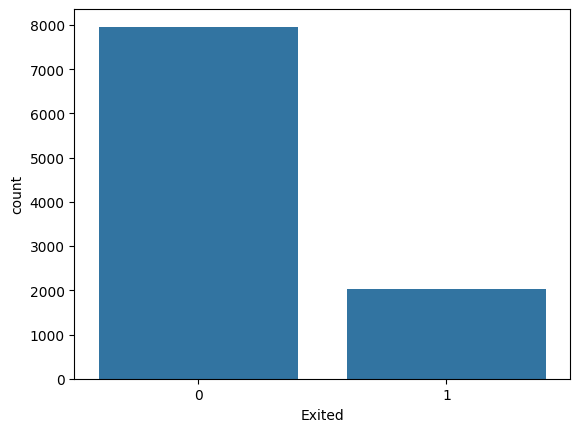

In [16]:
freq=df['Exited'].value_counts()
sns.countplot(x='Exited',data=df)
freq

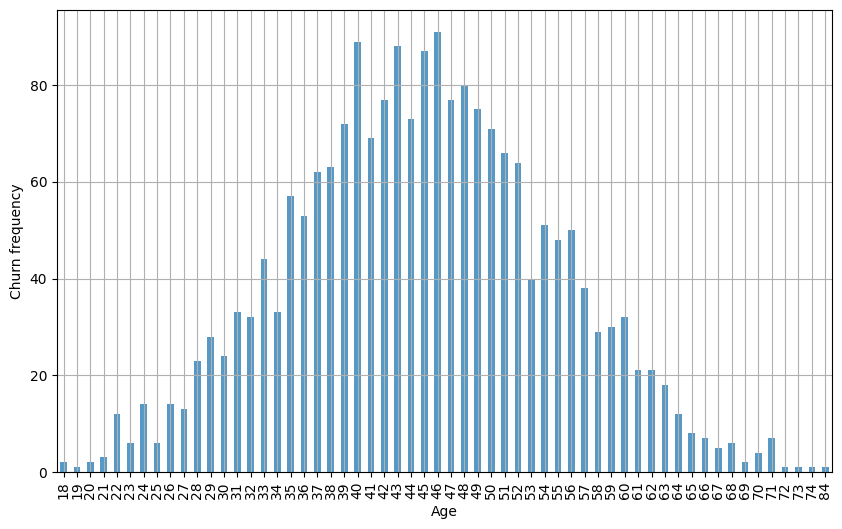

In [11]:
age_binary_count = df[df['Exited'] == 1].groupby('Age').size()
plt.figure(figsize=(10,6))
age_binary_count.plot(kind='bar', alpha=0.75)
plt.xticks(rotation=90)
plt.ylabel('Churn frequency')
plt.grid()
plt.show()

#Middle aged people have the highest churn rates, and it follows a bell shaped distribution

Text(0.5, 1.0, 'Churn by Credit Card Availability')

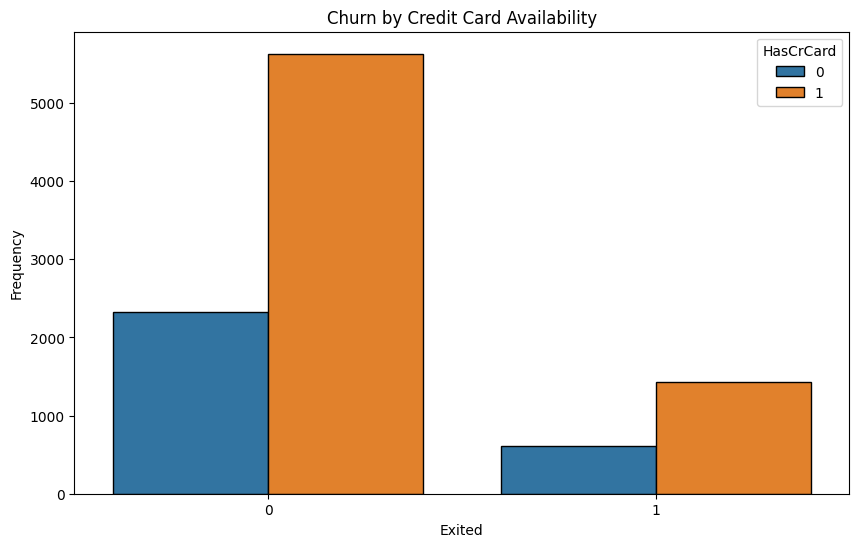

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x='Exited',hue='HasCrCard',data=df,edgecolor='black')
plt.xlabel('Exited')
plt.ylabel('Frequency')
plt.title('Churn by Credit Card Availability')


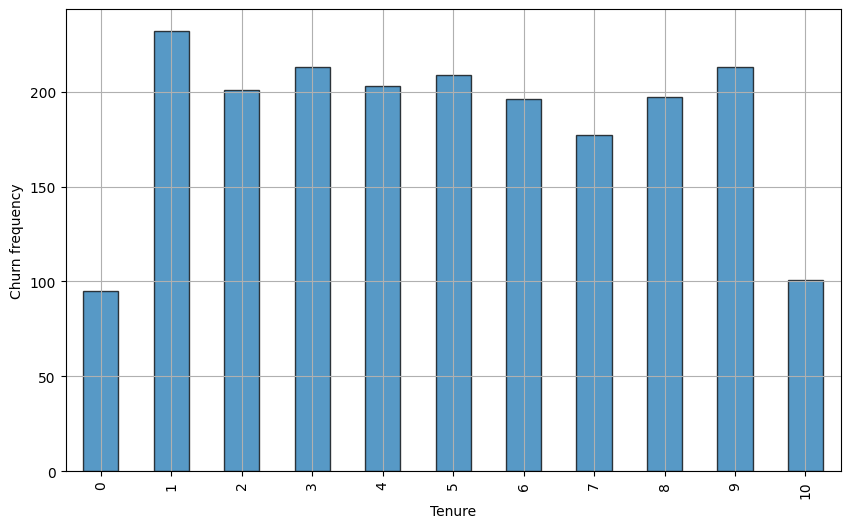

In [30]:
tenure_binary_count = df[df['Exited'] == 1].groupby('Tenure').size()
plt.figure(figsize=(10,6))
tenure_binary_count.plot(kind='bar', alpha=0.75,edgecolor='black')
plt.xticks(rotation=90)
plt.ylabel('Churn frequency')
plt.grid()
plt.show()

#People who have been associated with the service for too little or too long tend to drop out less frequently

<Axes: xlabel='CreditScore', ylabel='Count'>

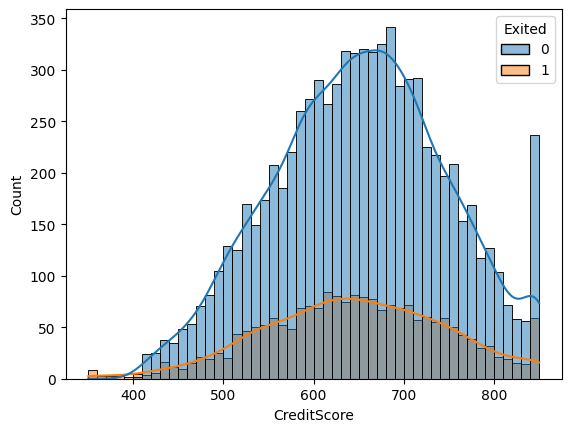

In [22]:
sns.histplot(data=df,x='CreditScore',hue='Exited',bins=50,kde=True)

#The graph is slightly right skewed

<Axes: xlabel='Balance', ylabel='Count'>

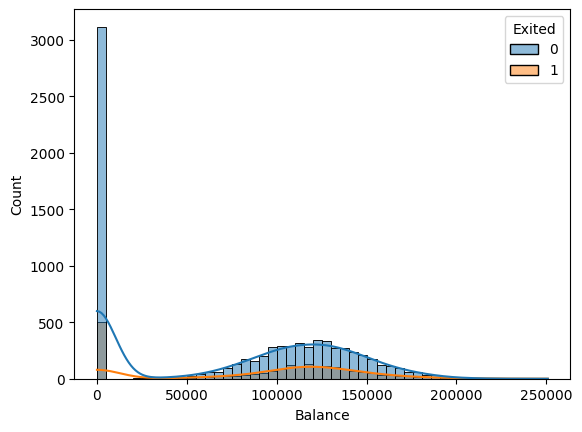

In [23]:
sns.histplot(data=df,x='Balance',hue='Exited',bins=50,kde=True)

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

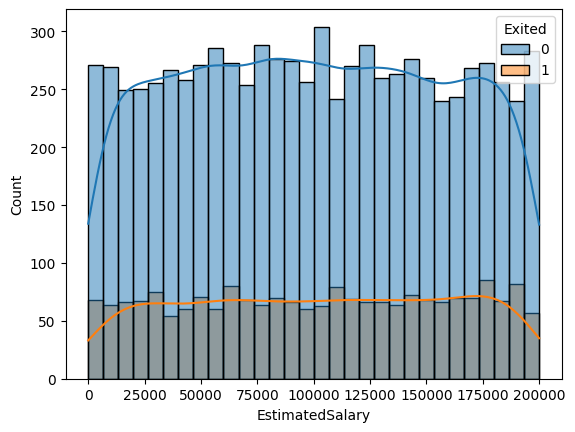

In [27]:
sns.histplot(data=df,x='EstimatedSalary',hue='Exited',bins=30,kde=True)


Text(0.5, 1.0, 'Churn by Geography')

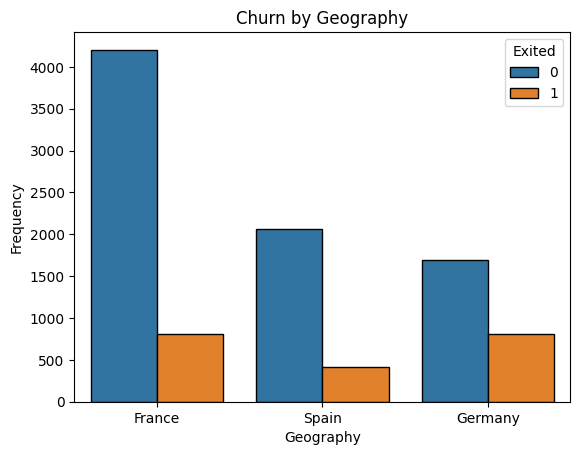

In [29]:
sns.countplot(x='Geography',hue='Exited',data=df,edgecolor='black')
plt.xlabel('Geography')
plt.ylabel('Frequency')
plt.title('Churn by Geography')

#France has the highest churn rates, followed by Germany and Spain

Text(0.5, 1.0, 'Churn by Gender')

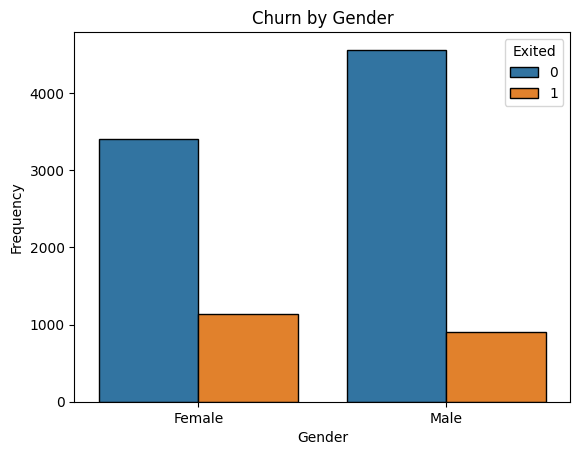

In [33]:
sns.countplot(x='Gender',hue='Exited',data=df,edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Churn by Gender')

#Female customers have higher churn rates as compared to males

<Axes: >

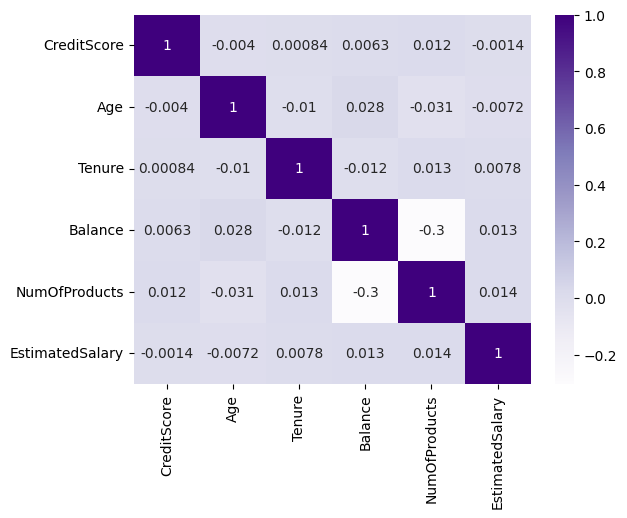

In [55]:
num_df=df[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]
sns.heatmap(num_df.corr(),annot=True,cmap='Purples')

In [38]:
X=df.drop(['Exited','RowNumber','CustomerId'],axis=1)
y=df['Exited']

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat_cols=['Surname','Geography','Gender']
for col in cat_cols:
  X[col]=le.fit_transform(X[col])

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

##Logistic Regression


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
print(accuracy_score(y_test,y_pred_lr))

0.8075


In [52]:
print(confusion_matrix(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

[[1555   38]
 [ 347   60]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1593
           1       0.61      0.15      0.24       407

    accuracy                           0.81      2000
   macro avg       0.71      0.56      0.56      2000
weighted avg       0.78      0.81      0.76      2000



##Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
print(accuracy_score(y_test,y_pred_rf))

0.856


In [57]:
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

#Random forest has improved precision on the '1' status in Exited

[[1539   54]
 [ 234  173]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1593
           1       0.76      0.43      0.55       407

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



Tuning hyperparameters with grid search

In [60]:
from sklearn.model_selection import GridSearchCV
rf2=RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}
grid_search = GridSearchCV(estimator=rf2, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred_best_rf=best_rf.predict(X_test)
print(accuracy_score(y_test,y_pred_best_rf))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
0.863


In [61]:
print(confusion_matrix(y_test,y_pred_best_rf))
print(classification_report(y_test,y_pred_best_rf))

#f1-scores have improved slightly

[[1543   50]
 [ 224  183]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.79      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



##ADABOOST CLASSIFIER

In [62]:
from sklearn.ensemble import AdaBoostClassifier
adc=AdaBoostClassifier()
adc.fit(X_train,y_train)
y_pred_adc=adc.predict(X_test)
print(accuracy_score(y_test,y_pred_adc))

0.8545


In [63]:
print(confusion_matrix(y_test,y_pred_adc))
print(classification_report(y_test,y_pred_adc))

[[1517   76]
 [ 215  192]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.72      0.47      0.57       407

    accuracy                           0.85      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



##GRADIENT BOOSTING CLASSIFIER

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(learning_rate=0.1)
gbc.fit(X_train,y_train)
y_pred_gbc=gbc.predict(X_test)
print(accuracy_score(y_test,y_pred_gbc))

0.8695


In [68]:
print(confusion_matrix(y_test,y_pred_gbc))
print(classification_report(y_test,y_pred_gbc))

#Gradient boost classifier performs slightly better

[[1543   50]
 [ 211  196]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.80      0.48      0.60       407

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

